<a href="https://colab.research.google.com/github/Ashu156/Neural-time-series-analysis-LFP/blob/main/inter_trial_phase_coherence_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Initialize and import required libraries
!pip install tensorpac
import os
import numpy as np
from tensorpac.utils import ITC, PSD
import matplotlib.pyplot as plt

     |████████████████████████████████| 423 kB 8.4 MB/s 


Compute PSD over 100 trials and 1000 time points
Inter-Trials Coherence (ITC)
    extracting 1 phases
Inter-Trials Coherence (ITC)
    extracting 54 phases


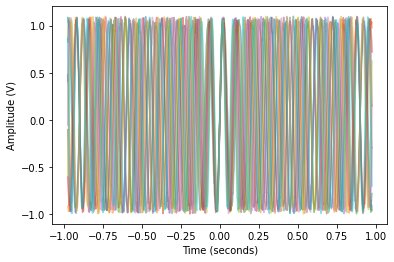

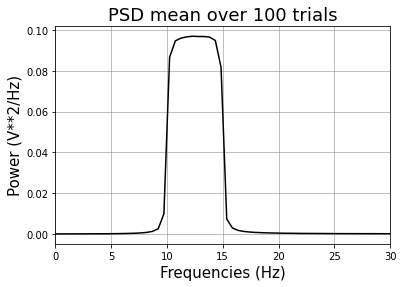

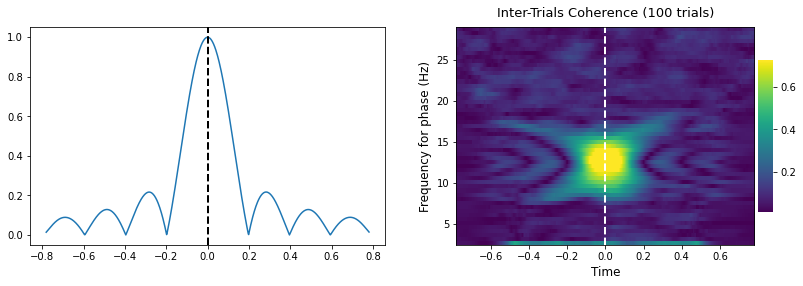

In [3]:
# Let's start by creating a random dataset
n_epochs = 100  # number of trials
n_pts = 1000    # number of time points
sf = 512.       # sampling frequency
f_min = 10      # minimum sine frequency
f_max = 15      # maximum sine frequency

# create sines
time = np.linspace(-n_pts / 2, n_pts / 2, n_pts) / sf
freqs = np.linspace(f_min, f_max, n_epochs)
data = np.sin(2 * np.pi * freqs.reshape(-1, 1) * time.reshape(1, -1))
data += .1 * np.random.rand(n_epochs, n_pts)

# plot some trials and see how sines are synchronized around 0
trials = np.linspace(0, n_epochs - 1, 10).astype(int)
plt.figure(0)
plt.plot(time, data[trials, :].T, alpha=.5)
plt.xlabel('Time (seconds)'), plt.ylabel('Amplitude (V)')

psd = PSD(data, sf)
plt.figure(1)
psd.plot(f_max=30, confidence= None)

edges = 100  # remove 10 points to remove edge effects due to filtering
cycle = 10   # number of cycles to use to extract the phase

plt.figure(2, figsize=(14, 4))

# compute ITC for phases between [2, 30]Hz
itc = ITC(data, sf, f_pha=[f_min, f_max], edges=edges, cycle=cycle, n_jobs=1)
plt.subplot(121)
itc.plot(times=time)
plt.axvline(0, linestyle='--', color='black', lw=2)

# compute ITC for phases between [2, 30]Hz with frequency steps
itc = ITC(data, sf, f_pha=(2, 30, 1, .5), edges=edges, cycle=cycle, n_jobs=1)
plt.subplot(122)
itc.plot(times=time, cmap='viridis')
plt.axvline(0, linestyle='--', color='white', lw=2)
itc.show()

In [1]:
# Using a real dataset
# Import data file from local machine
from google.colab import files
uploaded = files.upload()

Saving seeg_data_pac.npz to seeg_data_pac.npz


In [23]:
# Load data
filename = os.path.join(os.getcwd(), 'seeg_data_pac.npz')
arch = np.load(filename)
data = arch['data']       # data of a single sEEG contact
sf = float(arch['sf'])    # sampling frequency
times = arch['times']     # time vector
print(f"DATA: (n_trials, n_times)={data.shape}; SAMPLING FREQUENCY={sf}Hz; "
      f"TIME VECTOR: n_times={len(times)}")

DATA: (n_trials, n_times)=(160, 4001); SAMPLING FREQUENCY=1024.0Hz; TIME VECTOR: n_times=4001


In [5]:
# Function for adding the sections rest / planning / execution to each figure
def add_motor_condition(y_text, fontsize=14, color='k', ax=None):
    x_times = [-.5, 0.750, 2.250]
    x_conditions = ['REST', 'MOTOR\nPLANNING', 'MOTOR\nEXECUTION']
    if ax is None: ax = plt.gca()  # noqa
    plt.sca(ax)
    plt.axvline(0., lw=2, color=color)
    plt.axvline(1.5, lw=2, color=color)
    for x_t, t_t in zip(x_times, x_conditions):
        plt.text(x_t, y_text, t_t, color=color, fontsize=fontsize, ha='center',
                 va='center', fontweight='bold')

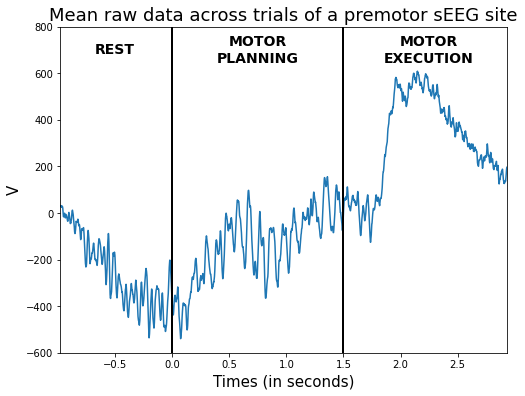

In [7]:
# Plot raw data for different phases of behavior
plt.figure(figsize=(8, 6))
plt.plot(times, data.mean(0))
plt.autoscale(axis='x', tight=True)
plt.title("Mean raw data across trials of a premotor sEEG site", fontsize=18)
plt.xlabel('Times (in seconds)', fontsize=15)
plt.ylabel('V', fontsize=15)
plt.ylim(-600, 800)
add_motor_condition(700.)
plt.show()

Inter-Trials Coherence (ITC)
    extracting 85 phases


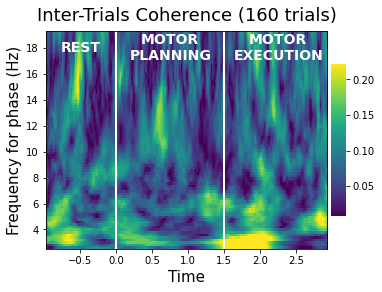

In [9]:
# Compute and plot inter-trial coherence (ITC)

itc = ITC(data, sf, f_pha=(2, 20, 1, .2))
itc.plot(times=times, cmap='viridis', fz_labels=15, fz_title=18)
add_motor_condition(18, color='white')
plt.show()

In [18]:
trials = np.linspace(0, data.shape[0] - 1, 10).astype(int)

In [21]:
sf = 1/times[1]-times[0]

Compute PSD over 160 trials and 4001 time points
Inter-Trials Coherence (ITC)
    extracting 1 phases
Inter-Trials Coherence (ITC)
    extracting 85 phases


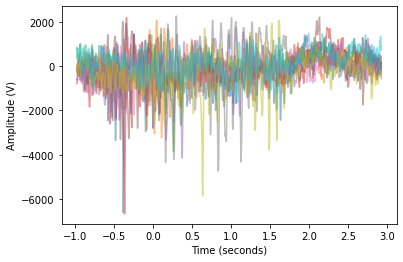

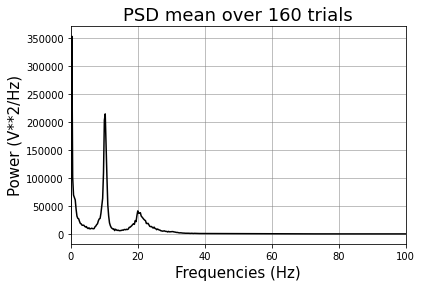

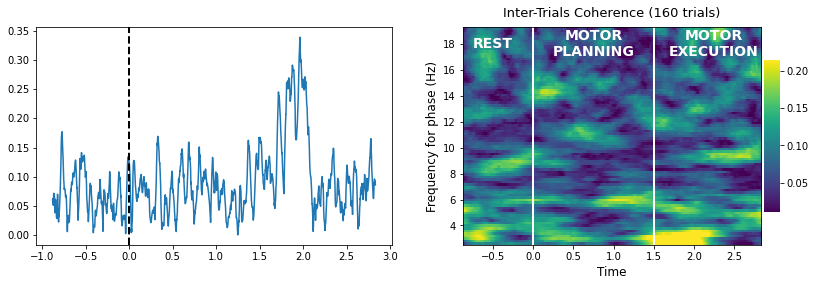

In [33]:
# Let's start by creating a random dataset
n_pts = 1000    # number of time points
f_min = 2      # minimum sine frequency
f_max = 20      # maximum sine frequency

# plot some trials and see how sines are synchronized around 0
trials = np.linspace(0, data.shape[0] - 1, 10).astype(int)
plt.figure(0)
plt.plot(times, data[trials, :].T, alpha=.5)
plt.xlabel('Time (seconds)'), plt.ylabel('Amplitude (V)')

psd = PSD(data, sf)
plt.figure(1)
psd.plot(f_max=100, confidence= None)

edges = 100  # remove 10 points to remove edge effects due to filtering
cycle = 10   # number of cycles to use to extract the phase

plt.figure(2, figsize=(14, 4))

# compute ITC for phases between [2, 30]Hz
itc = ITC(data, sf, f_pha=[f_min, f_max], edges=edges, cycle=cycle, n_jobs=1)
plt.subplot(121)
itc.plot(times=times)
# add_motor_condition(18, color='white')
plt.axvline(0, linestyle='--', color='black', lw=2)

# compute ITC for phases between [2, 30]Hz with frequency steps
itc = ITC(data, sf, f_pha=(2, 20, 1, .2), edges=edges, cycle=cycle, n_jobs=1)
plt.subplot(122)
itc.plot(times=times, cmap='viridis')
add_motor_condition(18, color='white')
plt.axvline(0, linestyle='--', color='white', lw=2)
itc.show()